# RA-I Assignment

The python codes for this assignment are generated using Groq(playground). This file contains 7 asked queries, following to each has a generated py code with an output of the cell next to it. The queries having their results as visuals are attatched in the repo itself.

LLM Prompt(template): 
"the  csv has a lot of rows(around 1048576), I want you generate the python
code for me to generate results P.S.: provided is just a part of the csv file 




df = pd.read_csv(
    'household_power_consumption.csv',
    sep=';',
    na_values=['?'],
    low_memory=False
)


df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)


df.drop(columns=['Date', 'Time'], inplace=True)






df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')





These are the codes I have already run


 #Paste the query you are trying to get answer for

Fix this error: Paste the error which occured after running a code for a particular query "




the above llm prompt template("....") was used for each query!

In [20]:
import pandas as pd

In [21]:
#Load the CSV without date parsing
df = pd.read_csv(
    'household_power_consumption.csv',
    sep=';',
    na_values=['?'],
    low_memory=False
)

#Combine 'Date' and 'Time' into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Optional: Drop the original columns if not needed, doesn't matter, because anyway we gonna use 'datetime' as an index through out.
df.drop(columns=['Date', 'Time'], inplace=True)


In [22]:
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

Q1. What was the average active power consumption in March 2007?

In [23]:
# Filter for March 2007
march_2007 = df[(df.index.month == 3) & (df.index.year == 2007)]

# Calculate the average active power consumption
average_active_power = march_2007['Global_active_power'].mean()

print(f"The average active power consumption in March 2007 was: {average_active_power} kW")

The average active power consumption in March 2007 was: 1.3186270301754073 kW


Q2. What hour of the day had the highest power usage on Christmas 2006?

In [24]:
# Filter for Christmas 2006
christmas_day = '2006-12-25'
df_christmas = df[df.index.date == pd.to_datetime(christmas_day).date()]

# Group by hour and find the mean or sum of power usage
df_christmas_by_hour = df_christmas.resample('h')['Global_active_power'].mean()

# Find the hour with the highest power usage
max_power_usage_hour = df_christmas_by_hour.idxmax()
max_power_usage = df_christmas_by_hour.max()

print(f"The hour with the highest power usage on Christmas 2006 was {max_power_usage_hour} with an average power usage of {max_power_usage} kW.")

The hour with the highest power usage on Christmas 2006 was 2006-12-25 22:00:00 with an average power usage of 4.2148666666666665 kW.


Q3. Compare energy usage (Global_active_power) on weekdays vs weekends.

Mean weekday energy usage: 1.0354720516747509
Mean weekend energy usage: 1.234232176791304


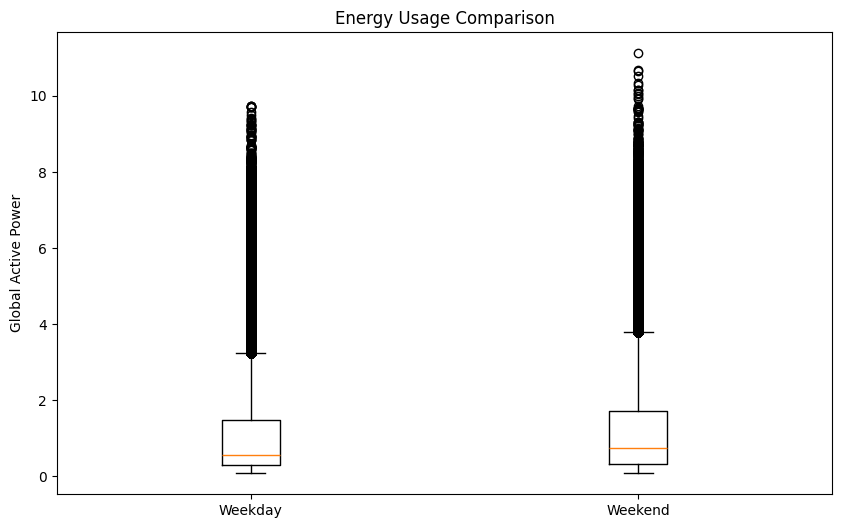

In [17]:
import matplotlib.pyplot as plt

# Extract the day of the week from the index
df['day_of_week'] = df.index.dayofweek

# Map dayofweek to weekday names for clarity
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week_name'] = df['day_of_week'].map(day_map)

# Group by weekday vs weekend
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 5 and 6 are Saturday and Sunday
df['period'] = df['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

#  Compare energy usage
weekday_usage = df[df['period'] == 'Weekday']['Global_active_power']
weekend_usage = df[df['period'] == 'Weekend']['Global_active_power']

# Calculate mean energy usage
mean_weekday_usage = weekday_usage.mean()
mean_weekend_usage = weekend_usage.mean()

print(f"Mean weekday energy usage: {mean_weekday_usage}")
print(f"Mean weekend energy usage: {mean_weekend_usage}")

# Visualize the comparison (optional)
plt.figure(figsize=(10,6))
plt.boxplot([weekday_usage, weekend_usage], labels=['Weekday', 'Weekend'])
plt.title('Energy Usage Comparison')
plt.ylabel('Global Active Power')
plt.show()

Q4. Find days where energy consumption exceeded 5 kWh.

In [8]:
# Resample data to calculate daily sum of Global_active_power
daily_consumption = df['Global_active_power'].resample('D').sum()

# Find days where energy consumption exceeded 5 kWh
exceeded_days = daily_consumption[daily_consumption > 5].index

# Print the result
print("Days where energy consumption exceeded 5 kWh:")
print(exceeded_days)

Days where energy consumption exceeded 5 kWh:
DatetimeIndex(['2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19',
               '2006-12-20', '2006-12-21', '2006-12-22', '2006-12-23',
               '2006-12-24', '2006-12-25',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', name='datetime', length=1433, freq=None)


Q5. Plot the energy usage trend for the first week of January 2007.

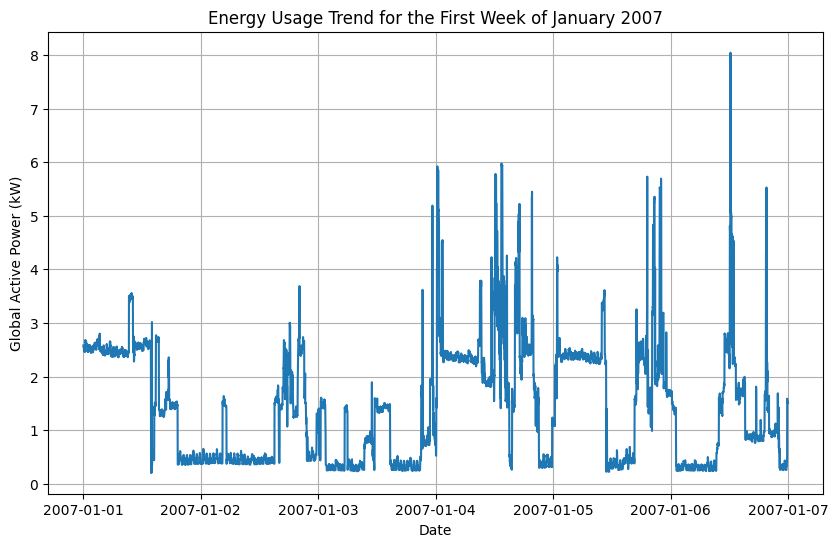

In [10]:
import matplotlib.pyplot as plt

# Filter data for the first week of January 2007
start_date = '2007-01-01'
end_date = '2007-01-07'
df_jan_1_7_2007 = df[(df.index >= start_date) & (df.index <= end_date)]   

# Plot the energy usage trend
plt.figure(figsize=(10,6))
plt.plot(df_jan_1_7_2007.index, df_jan_1_7_2007['Global_active_power'])
plt.title('Energy Usage Trend for the First Week of January 2007')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.show()

Q6. Find the average voltage for each day of the first week of February 2007.

In [11]:
# Filter for February 2007
df_feb_2007 = df[(df.index >= '2007-02-01') & (df.index < '2007-02-08')]

#  Filter for the first week of February 2007
df_feb_week1_2007 = df_feb_2007[(df_feb_2007.index >= '2007-02-01') & (df_feb_2007.index < '2007-02-08')]

# To avoid the SettingWithCopyWarning, it's better to use .loc[] for setting values
df_feb_week1_2007.loc[:, 'day'] = df_feb_week1_2007.index.day

# Group by day and calculate the average voltage
average_voltage_per_day = df_feb_week1_2007.groupby('day')['Voltage'].mean()

print(average_voltage_per_day)

day
1    240.392139
2    240.334389
3    238.910194
4    239.633333
5    240.810312
6    241.264160
7    241.149694
Name: Voltage, dtype: float64


Q7. What is the correlation between global active power and sub-metering values?

In [17]:
sub_metering_columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


for col in sub_metering_columns:
    corr = df['Global_active_power'].corr(df[col])
    print(f"Correlation between Global_active_power and {col}: {corr}")


Correlation between Global_active_power and Sub_metering_1: 0.4844012751734995
Correlation between Global_active_power and Sub_metering_2: 0.43456871760221855
Correlation between Global_active_power and Sub_metering_3: 0.6385554235412781
